In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.calibration import calibration_curve, CalibratedClassifierCV
from sklearn.model_selection import cross_val_score, KFold, train_test_split, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, classification_report, roc_auc_score, roc_curve, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import Ridge, Lasso, LogisticRegression

In [68]:
# Get stats from csv
games_df = pd.read_csv('summary_data.csv')

In [69]:
# Baseline Model
X = games_df[['team_three_pm_avg_to_date']]
y = games_df['team_three_pm_next_game']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Define the random forest regressor model
base_rf_model = RandomForestRegressor()

# Define the number of folds for cross-validation
k_folds = 5

# # Define KFold cross-validator
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# # Perform cross-validation and get scores
mse_scores = -cross_val_score(base_rf_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(base_rf_model, X_train, y_train, cv=kf, scoring='r2')

# # Calculate mean scores
base_rf_mean_mse = np.mean(mse_scores)
base_rf_mean_r2 = np.mean(r2_scores)

print("Mean Squared Error (MSE) across {} folds: {:.4f}".format(k_folds, base_rf_mean_mse))
print("Mean R-squared (R^2) across {} folds: {:.4f}".format(k_folds, base_rf_mean_r2))

Mean Squared Error (MSE) across 5 folds: 10.4234
Mean R-squared (R^2) across 5 folds: 0.1255


In [71]:
# Everything model
X = games_df[[col for col in games_df.columns if 'avg_to_date' in col or 'last_5' in col]]
y = games_df['team_three_pm_next_game']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Define the random forest regressor model
rf_model = RandomForestRegressor()

# Define the number of folds for cross-validation
k_folds = 5

# # Define KFold cross-validator
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# # Perform cross-validation and get scores
mse_scores = -cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='r2')

# # Calculate mean scores
rf_mean_mse = np.mean(mse_scores)
rf_mean_r2 = np.mean(r2_scores)

print("Mean Squared Error (MSE) across {} folds: {:.4f}".format(k_folds, rf_mean_mse))
print("Mean R-squared (R^2) across {} folds: {:.4f}".format(k_folds, rf_mean_r2))


Mean Squared Error (MSE) across 5 folds: 8.5605
Mean R-squared (R^2) across 5 folds: 0.2802


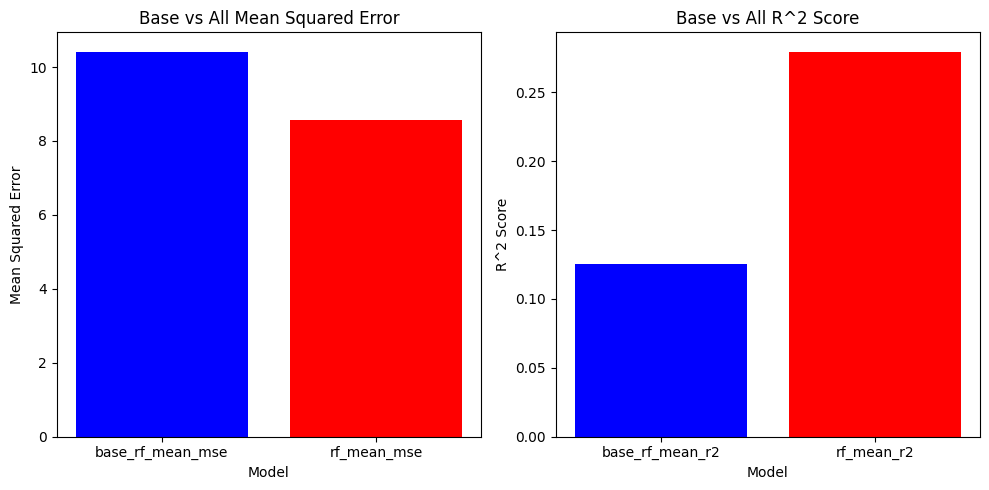

In [73]:
base_rf_mean_mse = 10.4190
rf_mean_mse = 8.5594
base_rf_mean_r2 = 0.1256
rf_mean_r2 = 0.2797

# Plotting base_rf_mean_mse against rf_mean_mse
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(['base_rf_mean_mse', 'rf_mean_mse'], [base_rf_mean_mse, rf_mean_mse], color=['blue', 'red'])
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Base vs All Mean Squared Error')

# Plotting base_rf_mean_r2 against rf_mean_r2
plt.subplot(1, 2, 2)
plt.bar(['base_rf_mean_r2', 'rf_mean_r2'], [base_rf_mean_r2, rf_mean_r2], color=['blue', 'red'])
plt.xlabel('Model')
plt.ylabel('R^2 Score')
plt.title('Base vs All R^2 Score')

plt.tight_layout()
plt.show()


In [74]:
# Define XGBoost Random Forest parameters
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',  # Root Mean Squared Error
    'booster': 'gbtree',  # Use tree-based models
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bynode': 0.8,  # Subsample ratio of columns when constructing each tree
    'tree_method': 'hist'  # Use histogram-based algorithms for approximate tree method
}

# Initialize the XGBoost Random Forest model
xgb_model = xgb.XGBRFRegressor(**params)

# Fit the model to your data
xgb_model.fit(X, y)

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Create a list of feature names
feature_names = X.columns

# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get predictions
y_pred = cross_val_predict(xgb_model, X, y, cv=kf)

# Calculate Mean Squared Error
xg_mse = mean_squared_error(y, y_pred)

# Calculate R-squared
xg_r2 = r2_score(y, y_pred)

# Print the MSE and R-squared values
print("Mean Squared Error (MSE):", xg_mse)
print("R-squared (R^2):", xg_r2)


Mean Squared Error (MSE): 8.221665824198436
R-squared (R^2): 0.3078385094112086


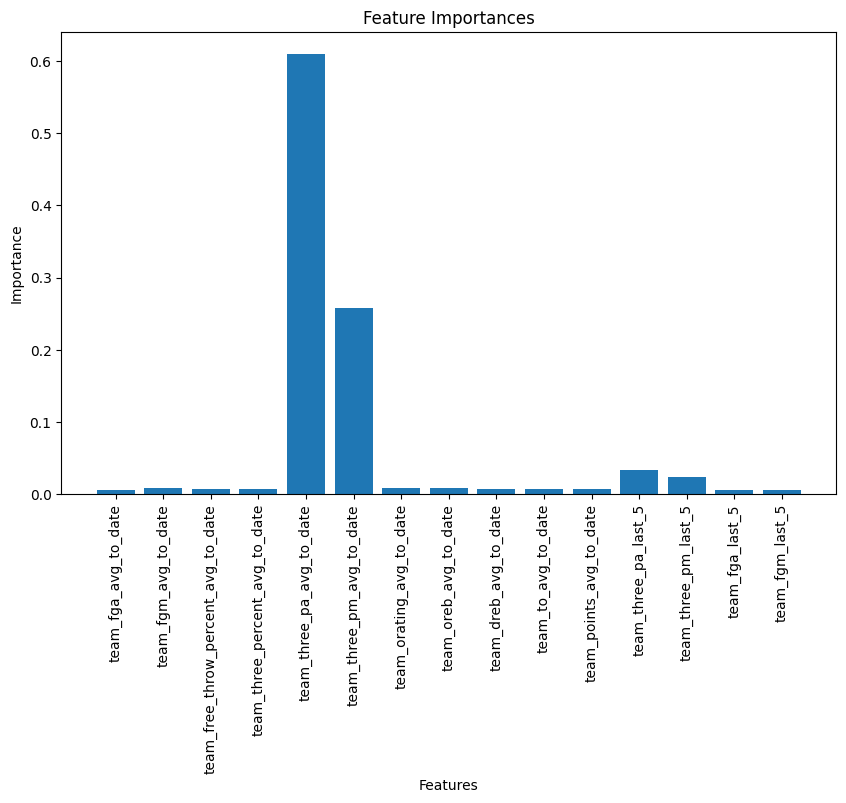

In [75]:
# Plotting XGBoost Random Forest parameters
params = {
    'objective': 'reg:squarederror',  # Regression task
    'eval_metric': 'rmse',  # Root Mean Squared Error
    'booster': 'gbtree',  # Use tree-based models
    'subsample': 0.8,  # Subsample ratio of the training instances
    'colsample_bynode': 0.8,  # Subsample ratio of columns when constructing each tree
    'tree_method': 'hist'  # Use histogram-based algorithms for approximate tree method
}

# Initialize the XGBoost Random Forest model
xgb_model = xgb.XGBRFRegressor(**params)

# Fit the model to your data
xgb_model.fit(X, y)

# Get feature importances
feature_importances = xgb_model.feature_importances_

# Create a list of feature names
feature_names = X.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_names, feature_importances)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [76]:
# Initialize a Ridge model
ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation on the training set
cv_r2_scores = cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring='r2')
rg_average_cv_r2 = np.mean(cv_r2_scores)

cv_mse_scores = cross_val_score(ridge_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
rg_average_cv_mse = -np.mean(cv_mse_scores)

# Print the results
print(f'Average R-squared value (Cross-validation): {rg_average_cv_r2}')
print(f'Average Mean Squared Error (Cross-validation): {rg_average_cv_mse}')

Average R-squared value (Cross-validation): 0.3072928574637748
Average Mean Squared Error (Cross-validation): 8.244697329376184


In [77]:
# Initialize a Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the regularization strength (alpha) as needed

# Define k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform k-fold cross-validation
cv_r2_scores = cross_val_score(lasso_model, X, y, cv=kf, scoring='r2')
ls_average_cv_r2 = np.mean(cv_r2_scores)

cv_mse_scores = -cross_val_score(lasso_model, X, y, cv=kf, scoring='neg_mean_squared_error')
ls_average_cv_mse = np.mean(cv_mse_scores)

# Print the results
print(f'Average R-squared value (Cross-validation): {ls_average_cv_r2}')
print(f'Average Mean Squared Error (Cross-validation): {ls_average_cv_mse}')

Average R-squared value (Cross-validation): 0.29933290379638877
Average Mean Squared Error (Cross-validation): 8.322037728823592


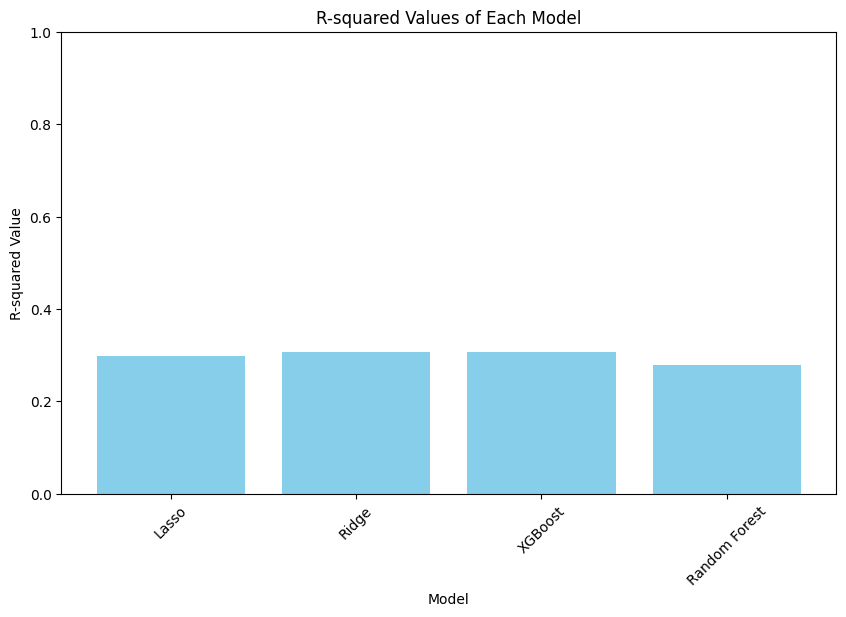

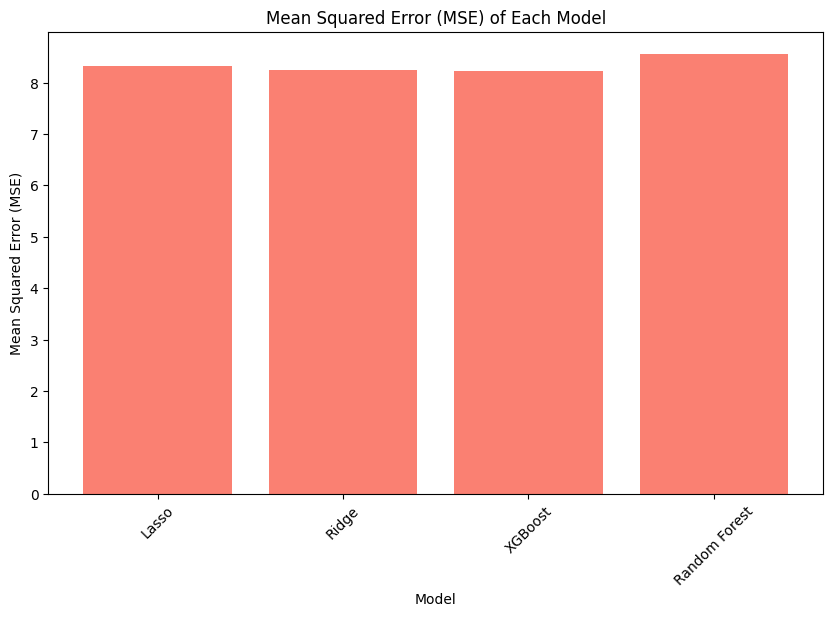

In [78]:
# Define models and their corresponding R-squared and MSE values
models = ['Lasso', 'Ridge', 'XGBoost', 'Random Forest']
r_squared_values = [ls_average_cv_r2, rg_average_cv_r2, xg_r2, rf_mean_r2]
mse_values = [ls_average_cv_mse, rg_average_cv_mse, xg_mse, rf_mean_mse]


# Plot R-squared values
plt.figure(figsize=(10, 6))
plt.bar(models, r_squared_values, color='skyblue')
plt.title('R-squared Values of Each Model')
plt.xlabel('Model')
plt.ylabel('R-squared Value')
plt.ylim(0, 1)  # Set y-axis limit to range [0, 1]
plt.xticks(rotation=45)
plt.show()

# Plot MSE values
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='salmon')
plt.title('Mean Squared Error (MSE) of Each Model')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.xticks(rotation=45)
plt.show()


In [79]:
# Classification model data
X = games_df[[col for col in games_df.columns if 'avg_to_date' in col or 'last_5' in col]]
y = games_df['free_fries']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

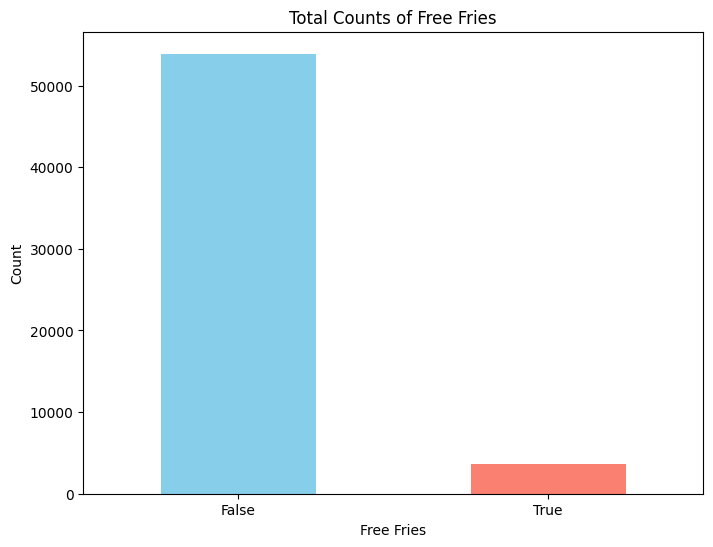

In [80]:
# Count occurrences of true and false in the 'free_fries' column
free_fries_counts = games_df['free_fries'].value_counts()

# Plot the totals
plt.figure(figsize=(8, 6))
free_fries_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Total Counts of Free Fries')
plt.xlabel('Free Fries')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [81]:
# Initialize Logistic Regression model
log_reg_model = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)

# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get predicted probabilities
y_pred_proba = cross_val_predict(log_reg_model, X, y, cv=kf, method='predict_proba')

# Convert probabilities to binary predictions
y_pred_binary = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to binary predictions

# Print classification report
print("Log Model Classification Report:")
print(classification_report(y, y_pred_binary))

# Calculate Area Under the ROC Curve (AUC)
log_auc = roc_auc_score(y, y_pred_proba[:, 1])

# Print AUC
print("Area Under the ROC Curve (AUC):", log_auc)

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)

c:\Users\goche\anaconda3\envs\MSCI446\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\goche\anaconda3\envs\MSCI446\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Log Model Classification Report:
              precision    recall  f1-score   support

       False       0.94      1.00      0.97     53902
        True       0.41      0.03      0.05      3592

    accuracy                           0.94     57494
   macro avg       0.67      0.51      0.51     57494
weighted avg       0.91      0.94      0.91     57494

Area Under the ROC Curve (AUC): 0.8401864383262903
Confusion Matrix:
[[53771   131]
 [ 3502    90]]


In [82]:
# Initialize Random Forest model
rf_model = RandomForestClassifier()

# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get predicted probabilities
y_pred_proba = cross_val_predict(rf_model, X, y, cv=kf, method='predict_proba')

# Convert probabilities to binary predictions
y_pred_binary = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to binary predictions

# Print classification report
print("Random Forest Classification Report:")
print(classification_report(y, y_pred_binary))

# Calculate Area Under the ROC Curve (AUC)
rf_auc = roc_auc_score(y, y_pred_proba[:, 1])

# Print AUC
print("Area Under the ROC Curve (AUC):", rf_auc)

Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.99      0.97     53902
        True       0.31      0.04      0.07      3592

    accuracy                           0.93     57494
   macro avg       0.63      0.52      0.52     57494
weighted avg       0.90      0.93      0.91     57494

Area Under the ROC Curve (AUC): 0.8129704234542949


In [83]:
# Initialize XGBoost classifier model
xgb_model = xgb.XGBClassifier()

# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get predicted probabilities
y_pred_proba = cross_val_predict(xgb_model, X, y, cv=kf, method='predict_proba')

# Convert probabilities to binary predictions
y_pred_binary = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to binary predictions

# Print classification report
print("Xgboost Classification Report:")
print(classification_report(y, y_pred_binary))

# Calculate Area Under the ROC Curve (AUC)
xgb_auc = roc_auc_score(y, y_pred_proba[:, 1])

# Print AUC
print("Area Under the ROC Curve (AUC):", xgb_auc)

Xgboost Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.99      0.97     53902
        True       0.33      0.04      0.08      3592

    accuracy                           0.93     57494
   macro avg       0.63      0.52      0.52     57494
weighted avg       0.90      0.93      0.91     57494

Area Under the ROC Curve (AUC): 0.8186545125323951


In [84]:
# Initialize KNN classifier model
knn_model = KNeighborsClassifier()

# Define 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get predicted probabilities
y_pred_proba = cross_val_predict(knn_model, X, y, cv=kf, method='predict_proba')

# Convert probabilities to binary predictions
y_pred_binary = np.argmax(y_pred_proba, axis=1)  # Convert probabilities to binary predictions

# Print classification report
print("KNN Classification Report:")
print(classification_report(y, y_pred_binary))

# Calculate Area Under the ROC Curve (AUC)
knn_auc = roc_auc_score(y, y_pred_proba[:, 1])

# Print AUC
print("Area Under the ROC Curve (AUC):", knn_auc)

KNN Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.99      0.96     53902
        True       0.30      0.09      0.13      3592

    accuracy                           0.93     57494
   macro avg       0.62      0.54      0.55     57494
weighted avg       0.90      0.93      0.91     57494

Area Under the ROC Curve (AUC): 0.6917498299107371


<Figure size 1200x800 with 0 Axes>

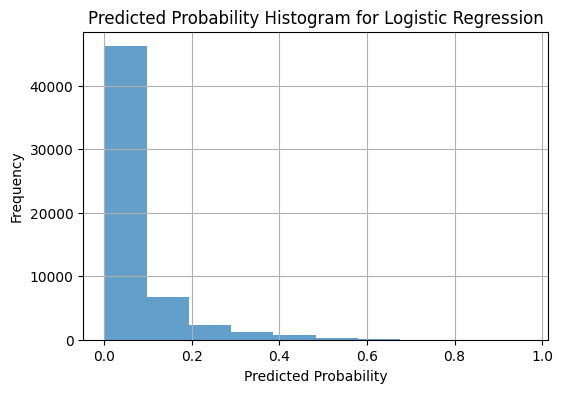

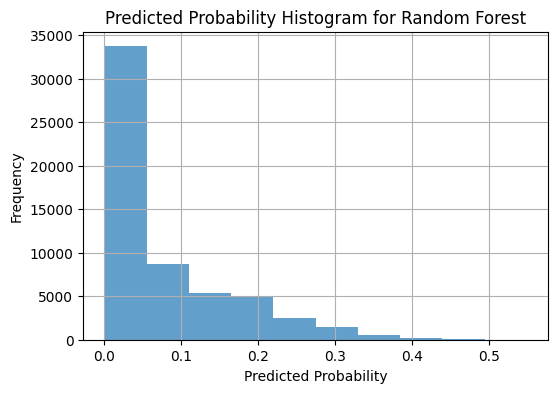

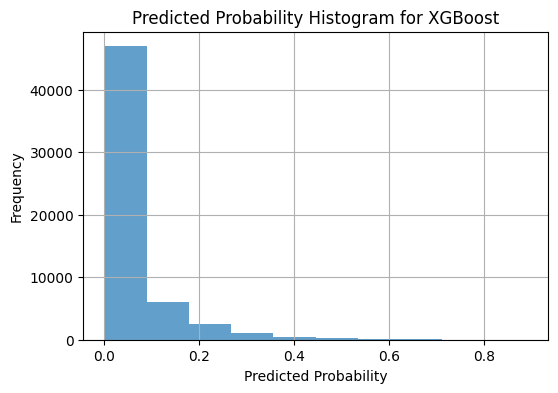

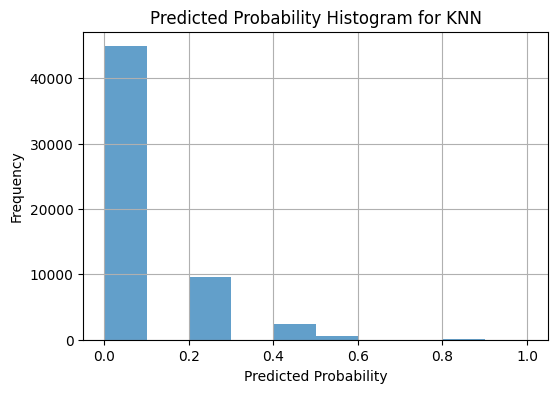

In [85]:
# Ploting probability histogram for each model
def plot_calibration_curves(models, X, y, n_bins=10):
    plt.figure(figsize=(12, 8))
    
    for name, model in models.items():
        if name == 'KNN':
            model.fit(X, y)  # Fit KNN model before predicting
        # Predict probabilities
        y_pred_proba = cross_val_predict(model, X, y, cv=KFold(), method='predict_proba')[:, 1]

        # Plot histogram for predicted probabilities
        plt.figure(figsize=(6, 4))
        plt.hist(y_pred_proba, bins=n_bins, alpha=0.7)
        plt.xlabel('Predicted Probability')
        plt.ylabel('Frequency')
        plt.title(f'Predicted Probability Histogram for {name}')
        plt.grid(True)
        plt.show()

# Define models
models = {
    'Logistic Regression': log_reg_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'KNN': knn_model
}

# Plot calibration curves and histograms for the models
plot_calibration_curves(models, X, y)

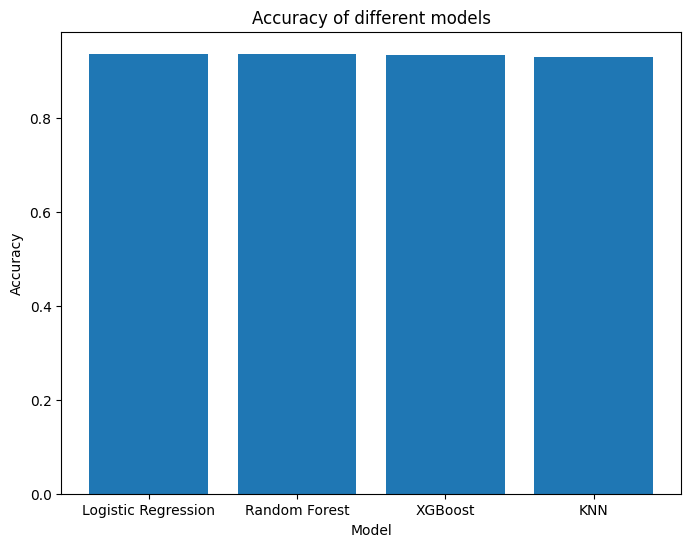

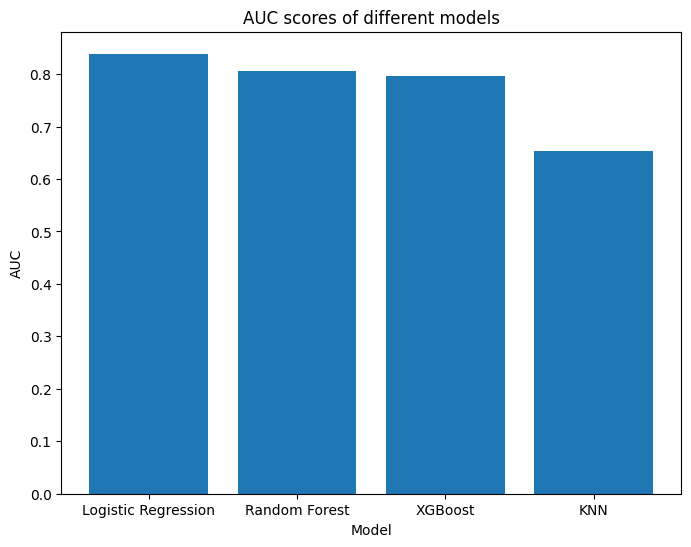

In [86]:
# Function to plot calibration curves for each model
def plot_calibration_curves(models, X, y, n_bins=10):
    accuracies = {}
    auc_scores = {}

    for name, model in models.items():
        if name == 'KNN':
            model.fit(X, y)  # Fit KNN model before predicting
        # Predict probabilities
        y_pred_proba = cross_val_predict(model, X, y, cv=KFold(), method='predict_proba')[:, 1]

        # Calculate accuracy
        y_pred = cross_val_predict(model, X, y, cv=KFold())
        accuracy = accuracy_score(y, y_pred)
        accuracies[name] = accuracy
        
        # Calculate AUC
        auc = roc_auc_score(y, y_pred_proba)
        auc_scores[name] = auc
    
    return accuracies, auc_scores

# Define models
models = {
    'Logistic Regression': log_reg_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'KNN': knn_model
}

# Plot accuracy and AUC for the models
accuracies, auc_scores = plot_calibration_curves(models, X, y)

# Plot accuracy scores
plt.figure(figsize=(8, 6))
plt.bar(range(len(accuracies)), list(accuracies.values()), align='center')
plt.xticks(range(len(accuracies)), list(accuracies.keys()))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of different models')
plt.show()

# Plot AUC scores
plt.figure(figsize=(8, 6))
plt.bar(range(len(auc_scores)), list(auc_scores.values()), align='center')
plt.xticks(range(len(auc_scores)), list(auc_scores.keys()))
plt.xlabel('Model')
plt.ylabel('AUC')
plt.title('AUC scores of different models')
plt.show()

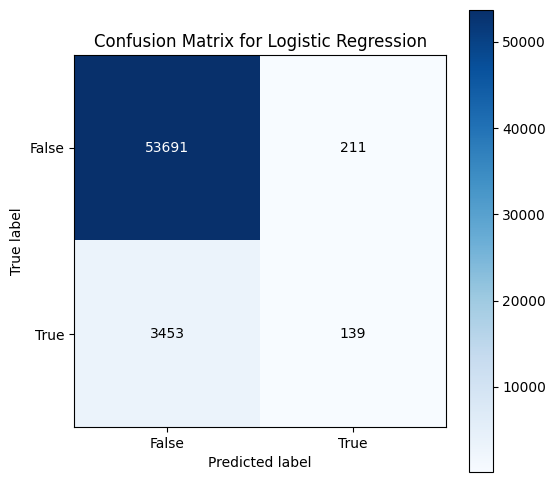

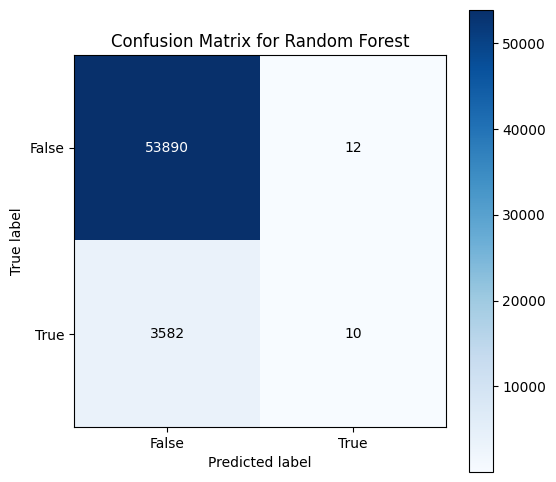

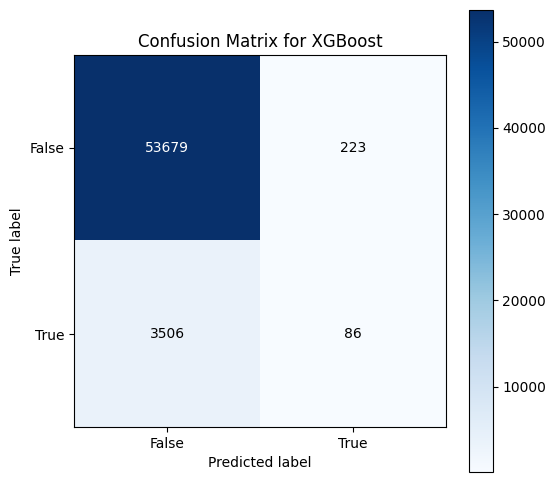

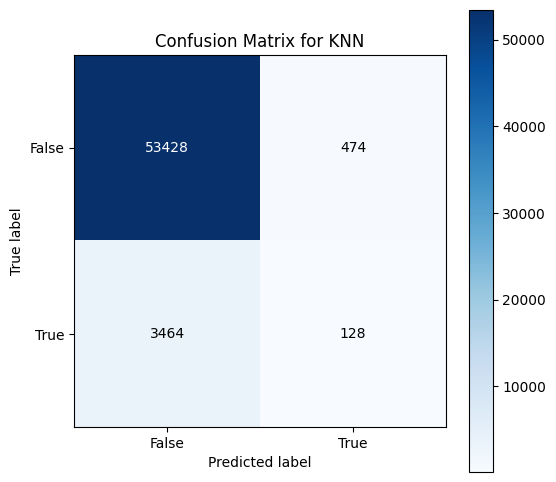

In [87]:
# Function to plot confusion matrices for each model
def plot_confusion_matrices(models, X, y):
    for name, model in models.items():
        # Fit the model if it's KNN
        if name == 'KNN':
            model.fit(X, y)  # Fit KNN model before predicting
        
        # Make cross-validated predictions
        y_pred = cross_val_predict(model, X, y, cv=KFold())
        
        # Calculate confusion matrix
        cm = confusion_matrix(y, y_pred)
        
        # Plot confusion matrix with counts
        plt.figure(figsize=(6, 6))
        plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix for {name}')
        plt.colorbar()
        tick_marks = np.arange(len(np.unique(y)))
        plt.xticks(tick_marks, np.unique(y))
        plt.yticks(tick_marks, np.unique(y))

        # Add text annotations
        thresh = cm.max() / 2.
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                plt.text(j, i, format(cm[i, j], 'd'),
                         ha="center", va="center",
                         color="white" if cm[i, j] > thresh else "black")
        
        plt.xlabel('Predicted label')
        plt.ylabel('True label')
        plt.show()

# Call the function to plot confusion matrices
plot_confusion_matrices(models, X, y)

c:\Users\goche\anaconda3\envs\MSCI446\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\goche\anaconda3\envs\MSCI446\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

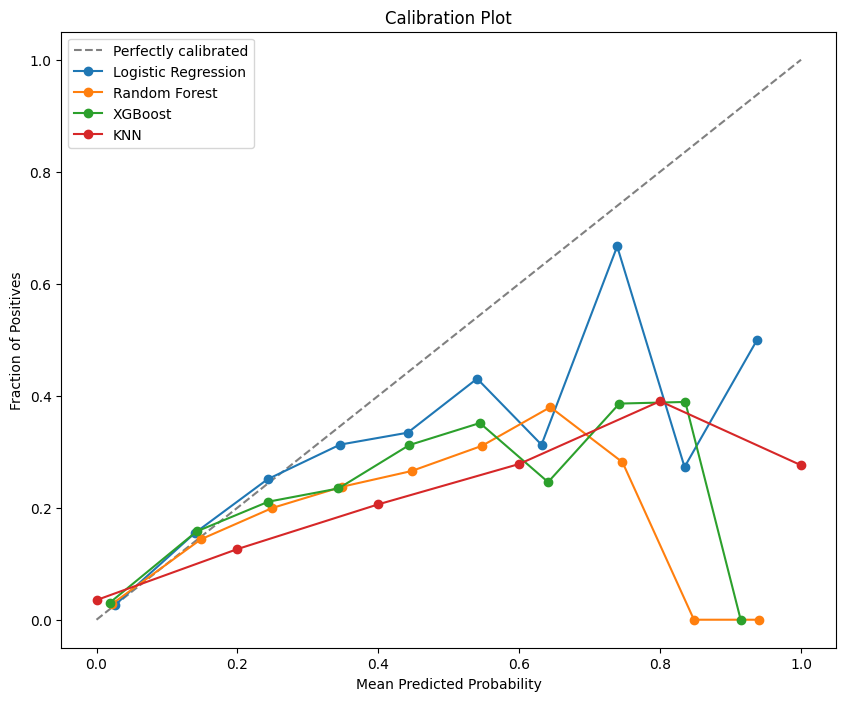

In [88]:
def plot_calibration_curves(models, X, y, n_bins=10):
    plt.figure(figsize=(10, 8))
    
    # Plot the perfect calibration curve
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly calibrated')
    
    for name, model in models.items():
        if name == 'KNN':
            model.fit(X, y)  # Fit KNN model before predicting
        # Predict probabilities
        y_pred_proba = cross_val_predict(model, X, y, cv=kf, method='predict_proba')[:, 1]
        
        # Calculate calibration curve
        true_prob, pred_prob = calibration_curve(y, y_pred_proba, n_bins=n_bins)
        
        # Plot calibration curve
        plt.plot(pred_prob, true_prob, marker='o', linestyle='-', label=name)

    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives')
    plt.title('Calibration Plot')
    plt.legend()
    plt.show()

# Define models
models = {
    'Logistic Regression': log_reg_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model,
    'KNN': knn_model
}

# Plot calibration curves for the models
plot_calibration_curves(models, X, y)


In [89]:
# Initialize calibrated Logistic Regression model
log_reg_model = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)

# Initialize Platt scaling
calibrated_model = CalibratedClassifierCV(log_reg_model, method='sigmoid', cv=kf)

# Perform cross-validation and get predicted probabilities
y_pred_proba_calibrated = cross_val_predict(calibrated_model, X, y, cv=kf, method='predict_proba')

# Convert probabilities to binary predictions
y_pred_binary_calibrated = np.argmax(y_pred_proba_calibrated, axis=1)

# Print classification report
print("Classification Report (Calibrated):")
print(classification_report(y, y_pred_binary_calibrated))

# Calculate Area Under the ROC Curve (AUC)
auc_calibrated = roc_auc_score(y, y_pred_proba_calibrated[:, 1])

# Print AUC
print("Area Under the ROC Curve (AUC, Calibrated):", auc_calibrated)

# Calculate Confusion Matrix
conf_matrix_calibrated = confusion_matrix(y, y_pred_binary_calibrated)
print("Confusion Matrix (Calibrated):")
print(conf_matrix_calibrated)


c:\Users\goche\anaconda3\envs\MSCI446\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\goche\anaconda3\envs\MSCI446\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Classification Report (Calibrated):
              precision    recall  f1-score   support

       False       0.94      1.00      0.97     53902
        True       0.39      0.02      0.04      3592

    accuracy                           0.94     57494
   macro avg       0.66      0.51      0.51     57494
weighted avg       0.90      0.94      0.91     57494

Area Under the ROC Curve (AUC, Calibrated): 0.8401493236219589
Confusion Matrix (Calibrated):
[[53774   128]
 [ 3510    82]]


In [90]:
# Initialize threshold Logistic Regression model
log_reg_model = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)

# Train the model
log_reg_model.fit(X_train, y_train)

# Predict probabilities on the validation set
y_pred_proba = log_reg_model.predict_proba(X)[:, 1]

# Choose a new threshold
new_threshold = 0.2  # Adjust this threshold to increase false positives

# Convert probabilities to binary predictions based on the new threshold
y_pred_binary = (y_pred_proba >= new_threshold).astype(int)

# Print classification report
print("Classification Report:")
print(classification_report(y, y_pred_binary))

# Calculate Area Under the ROC Curve (AUC)
auc = roc_auc_score(y, y_pred_proba)
print("Area Under the ROC Curve (AUC):", auc)

# Calculate Confusion Matrix
conf_matrix = confusion_matrix(y, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.94      0.95     53902
        True       0.29      0.35      0.31      3592

    accuracy                           0.91     57494
   macro avg       0.62      0.64      0.63     57494
weighted avg       0.91      0.91      0.91     57494

Area Under the ROC Curve (AUC): 0.840698772060059
Confusion Matrix:
[[50820  3082]
 [ 2348  1244]]


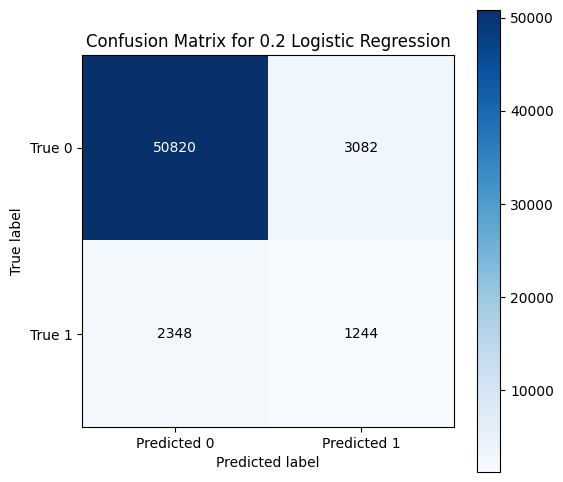

In [91]:
# Define the confusion matrix
conf_matrix = np.array([[50820, 3082],
                         [2348, 1244]])  # Replace TN, FP, FN, TP with actual values

# Plot confusion matrix with counts
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for 0.2 Logistic Regression')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Predicted 0', 'Predicted 1'])
plt.yticks(tick_marks, ['True 0', 'True 1'])

# Add text annotations
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

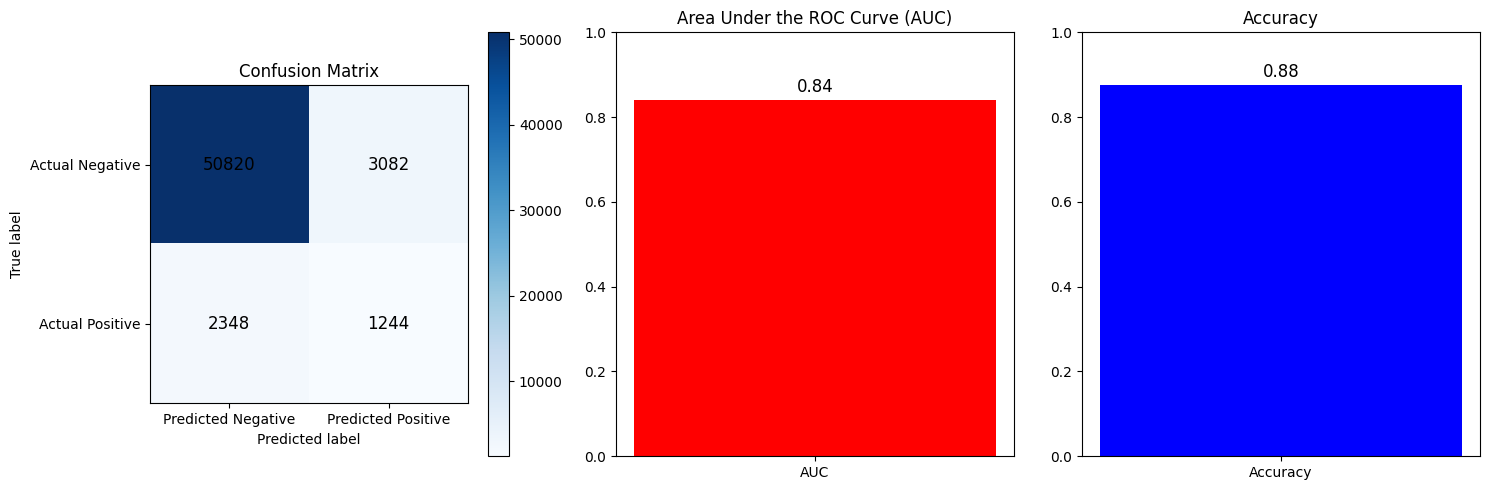

In [92]:
# Plotting Confusion Matrix, AUC, and Accuracy as subplots
plt.figure(figsize=(15, 5))

# Confusion Matrix
plt.subplot(1, 3, 1)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to each cell
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), fontsize=12,
                 horizontalalignment='center',
                 verticalalignment='center', color='black')

plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')

# AUC
plt.subplot(1, 3, 2)
plt.bar(['AUC'], [auc], color='red')
plt.text(0, auc + 0.01, f'{auc:.2f}', ha='center', va='bottom', fontsize=12)
plt.title('Area Under the ROC Curve (AUC)')
plt.ylim(0, 1)

# Accuracy
plt.subplot(1, 3, 3)
plt.bar(['Accuracy'], [accuracy], color='blue')
plt.text(0, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom', fontsize=12)
plt.title('Accuracy')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

In [93]:
# Initialize F1 optimized Logistic Regression model
log_reg_model = LogisticRegression(penalty='l2', C=1.0, max_iter=1000)

# Train the model
log_reg_model.fit(X_train, y_train)

# Predict probabilities on the validation set
y_pred_proba = log_reg_model.predict_proba(X)[:, 1]

# Initialize variables to store optimal threshold and corresponding F1 score
optimal_threshold = 0
best_f1_score = 0

# Iterate over a range of threshold values
for threshold in np.arange(0.1, 1, 0.05):
    # Convert probabilities to binary predictions based on the current threshold
    y_pred_binary = (y_pred_proba >= threshold).astype(int)
    
    # Calculate F1 score
    f1 = f1_score(y, y_pred_binary)
    
    # Update optimal threshold and F1 score if F1 score is better
    if f1 > best_f1_score:
        best_f1_score = f1
        optimal_threshold = threshold

# Convert probabilities to binary predictions based on the optimal threshold
y_pred_binary_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred_binary_optimal))

# Calculate precision, recall, F1 score, and accuracy
precision = precision_score(y, y_pred_binary_optimal)
recall = recall_score(y, y_pred_binary_optimal)
f1 = f1_score(y, y_pred_binary_optimal)
accuracy = accuracy_score(y, y_pred_binary_optimal)

# Calculate Area Under the ROC Curve (AUC)
auc = roc_auc_score(y, y_pred_proba)
print("Area Under the ROC Curve (AUC):", auc)

# Print performance metrics
print("\nPerformance Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")


Confusion Matrix:
[[48652  5250]
 [ 1902  1690]]
Area Under the ROC Curve (AUC): 0.840698772060059

Performance Metrics:
Precision: 0.24
Recall: 0.47
F1 Score: 0.32
Accuracy: 0.88


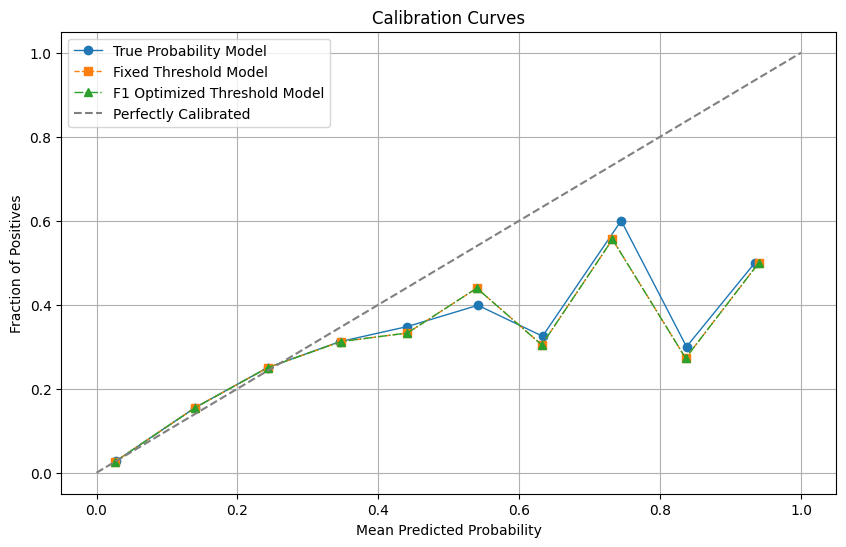

In [94]:
# Compute calibration curve for the first model
prob_true_calibrated, prob_pred_calibrated = calibration_curve(y, y_pred_proba_calibrated[:, 1], n_bins=10)

# Compute calibration curve for the second model with fixed threshold
prob_true_fixed, prob_pred_fixed = calibration_curve(y, y_pred_proba, n_bins=10)

# Compute calibration curve for the third model with optimized threshold
prob_true_optimal, prob_pred_optimal = calibration_curve(y, y_pred_proba, n_bins=10)

# Plot calibration curves
plt.figure(figsize=(10, 6))
plt.plot(prob_pred_calibrated, prob_true_calibrated, marker='o', linewidth=1, label='True Probability Model')
plt.plot(prob_pred_fixed, prob_true_fixed, marker='s', linestyle='--', linewidth=1, label='Fixed Threshold Model')
plt.plot(prob_pred_optimal, prob_true_optimal, marker='^', linestyle='-.', linewidth=1, label='F1 Optimized Threshold Model')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curves')
plt.legend()
plt.grid(True)
plt.show()


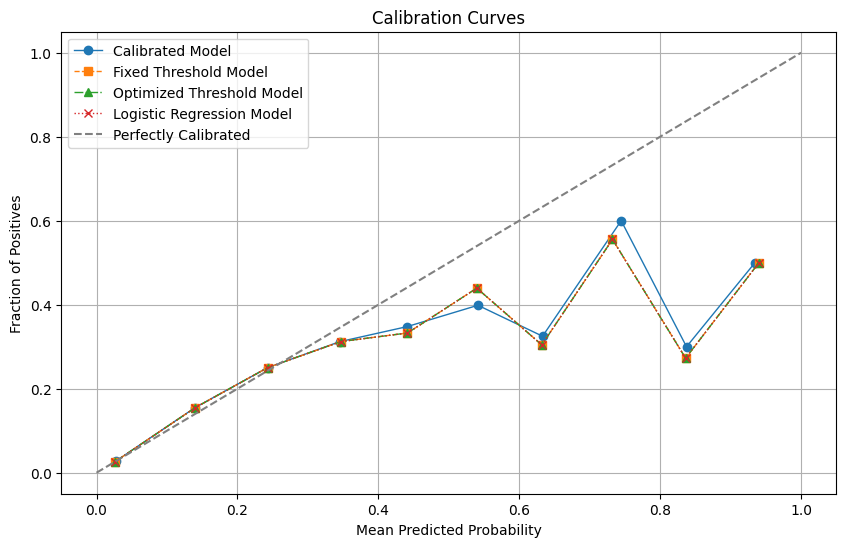

In [95]:
# Calibration curve for all 3 models

# Compute calibration curve for the calibrated model
prob_true_calibrated, prob_pred_calibrated = calibration_curve(y, y_pred_proba_calibrated[:, 1], n_bins=10)

# Compute calibration curve for the fixed threshold model
prob_true_fixed, prob_pred_fixed = calibration_curve(y, y_pred_proba, n_bins=10)

# Compute calibration curve for the optimized threshold model
prob_true_optimal, prob_pred_optimal = calibration_curve(y, y_pred_proba, n_bins=10)

# Compute calibration curve for the Logistic Regression model
prob_true_log, prob_pred_log = calibration_curve(y, y_pred_proba, n_bins=10)

# Plot calibration curves
plt.figure(figsize=(10, 6))
plt.plot(prob_pred_calibrated, prob_true_calibrated, marker='o', linewidth=1, label='Calibrated Model')
plt.plot(prob_pred_fixed, prob_true_fixed, marker='s', linestyle='--', linewidth=1, label='Fixed Threshold Model')
plt.plot(prob_pred_optimal, prob_true_optimal, marker='^', linestyle='-.', linewidth=1, label='Optimized Threshold Model')
plt.plot(prob_pred_log, prob_true_log, marker='x', linestyle=':', linewidth=1, label='Logistic Regression Model')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curves')
plt.legend()
plt.grid(True)
plt.show()

In [96]:
# Predict probabilities on the test set
y_pred_proba_test = log_reg_model.predict_proba(X_test)[:, 1]

# Choose a threshold
new_threshold = 0.2

# Convert probabilities to binary predictions based on the new threshold
y_pred_binary_test = (y_pred_proba_test >= new_threshold).astype(int)

# Print classification report
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred_binary_test))

# Calculate Area Under the ROC Curve (AUC) for the test data
auc_test = roc_auc_score(y_test, y_pred_proba_test)
print("Area Under the ROC Curve (AUC) on Test Data:", auc_test)

# Calculate Confusion Matrix for the test data
conf_matrix_test = confusion_matrix(y_test, y_pred_binary_test)
print("Confusion Matrix on Test Data:")
print(conf_matrix_test)


Classification Report on Test Data:
              precision    recall  f1-score   support

       False       0.96      0.94      0.95     10791
        True       0.27      0.33      0.30       708

    accuracy                           0.90     11499
   macro avg       0.61      0.64      0.62     11499
weighted avg       0.91      0.90      0.91     11499

Area Under the ROC Curve (AUC) on Test Data: 0.8369761210299229
Confusion Matrix on Test Data:
[[10160   631]
 [  471   237]]


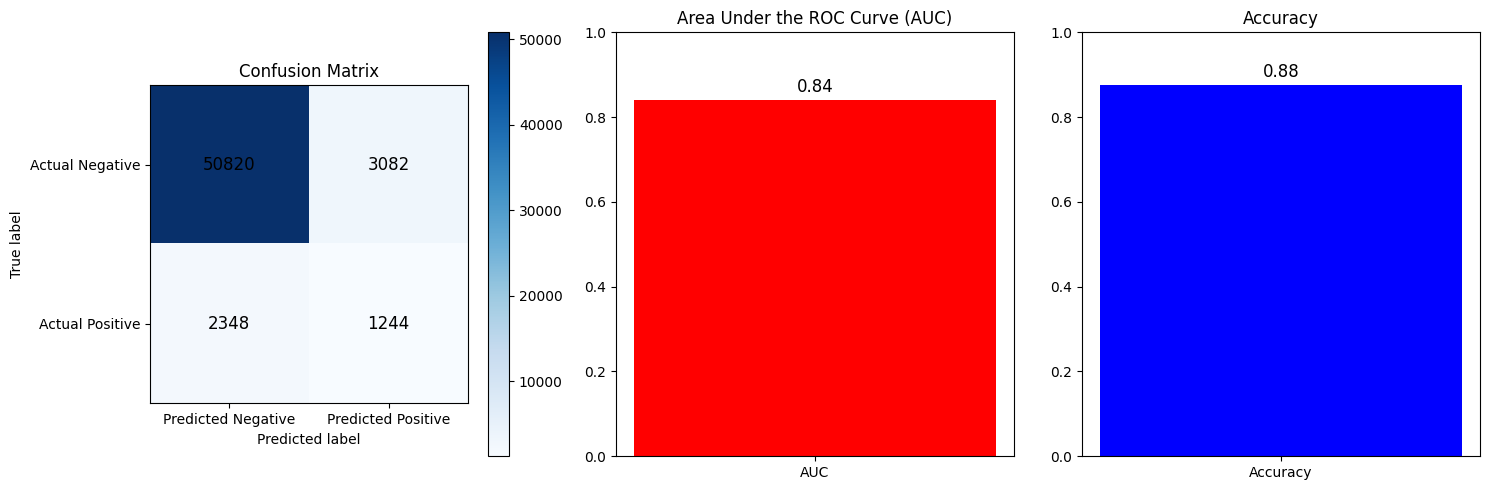

In [97]:
# Plotting Confusion Matrix, AUC, and Accuracy as subplots
plt.figure(figsize=(15, 5))

# Confusion Matrix
plt.subplot(1, 3, 1)
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels to each cell
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), fontsize=12,
                 horizontalalignment='center',
                 verticalalignment='center', color='black')

plt.xticks([0, 1], ['Predicted Negative', 'Predicted Positive'])
plt.yticks([0, 1], ['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')

# AUC
plt.subplot(1, 3, 2)
plt.bar(['AUC'], [auc], color='red')
plt.text(0, auc + 0.01, f'{auc:.2f}', ha='center', va='bottom', fontsize=12)
plt.title('Area Under the ROC Curve (AUC)')
plt.ylim(0, 1)

# Accuracy
plt.subplot(1, 3, 3)
plt.bar(['Accuracy'], [accuracy], color='blue')
plt.text(0, accuracy + 0.01, f'{accuracy:.2f}', ha='center', va='bottom', fontsize=12)
plt.title('Accuracy')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()